# UNIVERSIDAD POLITÉCNICA SALESIANA 
# El VECINO - CUENCA

**Estudiante:**Gustavo Guallpa

**Profesor:** Ing. Diego Quisi

**Asignatura:** Simulación

**Fecha:** 02/11/2020.

**Tema:** Regresión:COVID-19 ECUADOR

# Ejercicio
**1)BASE DE DATOS ACTUALIZADA DEL COVID-19 EN ECUADOR**

Para la obtención de los datos se hizo una recolección que es propiamente realizada por el estudiante , de fuentes que se encuentran citadas en las referencias, los datos estan hasta la fecha de 30 de Octubre de 2020.


In [292]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [293]:
#Leemos los datos.
path='covid19.csv'
df=pd.read_csv(path)
#df.head(300)
df

,dateRep,day,month,year,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,2020-02-28,28,2,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,1,0,0,NaN,NaN,NaN,NaN
1,2020-02-29,29,2,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,3,0,0,NaN,NaN,NaN,NaN
2,2020-03-01,1,3,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,6,0,0,NaN,NaN,NaN,NaN
3,2020-03-02,2,3,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,6,0,0,NaN,NaN,NaN,NaN
4,2020-03-03,3,3,2020,Ecuador,2020-03-03T15:13:26,-1.8312,-78.1834,7,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2020-10-26,26,10,2020,Ecuador,27-10-20 04:24,-1.8312,-78.1834,162178,12573,141759,7846.0,Ecuador,919.216961,7.752593
242,2020-10-27,27,10,2020,Ecuador,28-10-20 04:24,-1.8312,-78.1834,163192,12588,141759,8845.0,Ecuador,924.964264,7.713613
243,2020-10-28,28,10,2020,Ecuador,29-10-20 04:24,-1.8312,-78.1834,164908,12608,141759,10541.0,Ecuador,934.690468,7.645475
244,2020-10-29,29,10,2020,Ecuador,30-10-20 04:24,-1.8312,-78.1834,166302,12622,141759,11921.0,Ecuador,942.591591,7.589806


In [294]:
df = df.loc[:,['dateRep','Confirmed']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-28", FMT)).days)
df

,dateRep,Confirmed
0,0,1
1,1,3
2,2,6
3,3,6
4,4,7
...,...,...
241,241,162178
242,242,163192
243,243,164908
244,244,166302


Text(0, 0.5, 'Número Casos')

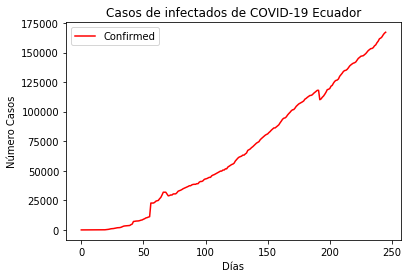

In [295]:
# Represento los datos generados
ax = df.plot(x ='dateRep', y='Confirmed',color='red',title='Casos de infectados de COVID-19 Ecuador')
ax.set_xlabel("Días")
ax.set_ylabel("Número Casos")

## Regresión lineal simple
**Introducción al modelo**

La regresión lineal simple parte de una sóla variable predictora, es decir X=x1dondeX∈R y supone que existe aproximadamente una relación lineal entre X e Y. Esta relación lineal puede ser escrita como:

<img src="img/1.PNG">

Los términos β0 y β1 representan respectivamente el interceptor(β0-ordenada en el origen ) y la pendiente(β1 ) del modelo lineal.

Una vez obtenida la estimación de estos dos coeficientes se puede predecir la variable Y usando X conocidos y a partir de la siguiente fórmula:

<img src="img/2.PNG">


In [296]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(np.array(x).reshape(-1,1), y)

#Ahora vamoa a calcular b_0
print (u'Ordenada al origen: ', modelo.intercept_)

# Ahora puedo obtener el coeficiente b_1
print (u'Pendiente: ', modelo.coef_[0])
beta = modelo.coef_[0]#Modificar el valor de la pendiente.
# Podemos predecir usando el modelo
y_pred = modelo.predict(np.array(x).reshape(-1,1))
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2(Precisión del modelo.)
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))

Ordenada al origen:  -20794.16256871067
Pendiente:  712.6381945214146
Error cuadrático medio: 48555124.23
Estadístico R_2: 0.98


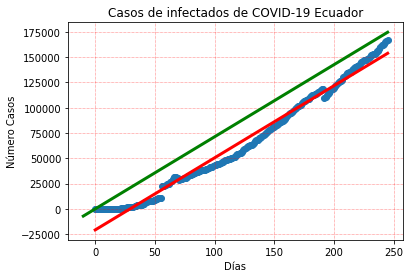

In [297]:
#Graficar

# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)#Dibujo mis puntos originales
plt.plot(x, y_pred, color='red',linewidth=3.0) #Dibujo con os valores ya predecidos.

#Bibujamos puntos reales.
x_real = np.array([-10, 245])
y_real = x_real *beta
plt.plot(x_real, y_real, color='green',linewidth=3.0)


#Propiedades
plt.title('Casos de infectados de COVID-19 Ecuador')
plt.xlabel('Días')
plt.ylabel('Número Casos')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

**2)PREDECIR PROXIMA SEMANA Y PROXIMO MES.**

In [298]:
#Vamos a comprobar:
#Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
#Según nuestro modelo, hacemos:
#264-EN EL DÍA 30 + 7 dias = 271
y_semana = modelo.predict([[271]])
print('Próxima Semana',y_semana)

# Vamos a predecir el próximo mes.
#264-EN EL DÍA 30 + 30 dias = 294
y_mes = modelo.predict([[294]])
print('Próxima Mes',y_mes)

Próxima Semana [172330.78814659]
Próxima Mes [188721.46662059]



**3)CONSTRATE CUANTOS INFECTADOS Y RECUPERADOS UN MODELO DE REGRESION.**


Text(0, 0.5, 'Personas Recuperadas')

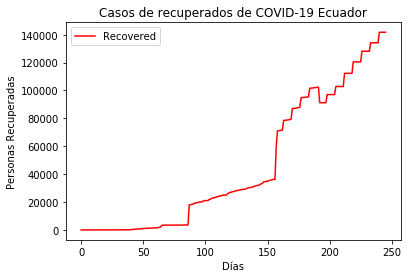

In [299]:
#Leemos los datos.
path='covid19.csv'
df=pd.read_csv(path)
#df.head(300)
df = df.loc[:,['dateRep','Recovered']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-28", FMT)).days)
# Represento los datos generados
ax = df.plot(x ='dateRep', y='Recovered',color='red',title='Casos de recuperados de COVID-19 Ecuador')
ax.set_xlabel("Días")
ax.set_ylabel("Personas Recuperadas")

In [300]:
#Aplicamos el modelo de regresion
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(np.array(x).reshape(-1,1), y)

#Ahora vamoa a calcular b_0
print (u'Ordenada al origen: ', modelo.intercept_)

# Ahora puedo obtener el coeficiente b_1
print (u'Pendiente: ', modelo.coef_[0])
beta1 = modelo.coef_[0]#Modificar el valor de la pendiente.
# Podemos predecir usando el modelo
y_pred = modelo.predict(np.array(x).reshape(-1,1))
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2(Precisión del modelo.)
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))

Ordenada al origen:  -30758.67176853952
Pendiente:  626.4709890512933
Error cuadrático medio: 243572463.05
Estadístico R_2: 0.89


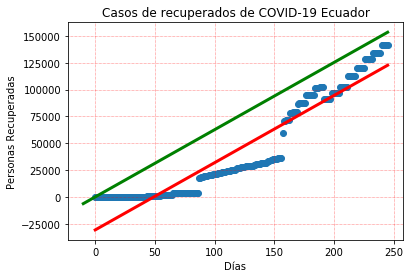

In [301]:
#Graficar

# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)#Dibujo mis puntos originales
plt.plot(x, y_pred, color='red',linewidth=3.0) #Dibujo con os valores ya predecidos.

#Bibujamos puntos reales.
x_real = np.array([-10, 245])
y_real = x_real *beta1
plt.plot(x_real, y_real, color='green',linewidth=3.0)


#Propiedades
plt.title('Casos de recuperados de COVID-19 Ecuador')
plt.xlabel('Días')
plt.ylabel('Personas Recuperadas')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

## Análisis
Al momento de la introducción de la materia cuando el profesor hablaba de simulación desde mi punto de vista me parecia un tema no muy importante , como que no me llamaba la atención , pense que no era un tema relevante de aprender, pero ya a medida que que el profesor avanzaba con la materia las cosas fueron cambiando , y veo que la simulación es algo muy importante porque nos permite crear modelos que nos ayudan a poder predecir datos futuros , con la ayuda de lenguajes de programación como python se puede crear estos modelos, el empleo de modelos matemáticos como la regresión lineal y y el empleo de librerías que nos ayudan a poder realizarlo de una manera sencilla.


## Conclusiones
Al momento de la recolección de datos se puedo evidenciar que la información que se puede encontrar en el internet es muy variada debido a que en algunas fuentes la información tiene unos datos y en otras fuentes estas tienen otros datos, inclusive se llegar a dudar de los datos que proporciona el mismo ministerio de salud, inclusive los datos que dan los medios de comunicación no son tan creibles.
Se puede observar que en nuestro país, al incio de la pandemia los casos crecíal levemente como se puede ver en la gráfica. 

<img src="img/3.PNG">

**CONTAGIOS**

Pero vemos que desde el mes de Marzo los casos comenzaron a crecer de una manera muy rápida, en la gráfica se pueve ver como que los casos fueron creciendo una manera muy leve , debido a que como vemos python nos gráfica con saltos grandes (escala de 25.000) para poder graficar todos los puntos, pero si hacemos la gráfica ya con la pendiente en herramientas gráficas como Desmos, Geogebra se puede ver que la recta de regresion valga la redundancia es una recta muy vertical es decir la inclinacion que se tiene es muy leve, y eso se puede comprobar con el valor de la pendiete que es de 712.6381945214146  

**RECUPERADOS**

En el caso de la personas recuperadas de Covid-19 se puede ver que al incio de la pandemia los caso de recuperados eran muy pocos,inclusive en los meses posteriores las recuperaciones fueran pocas si comparamos con los casos de personas contagiadas.


## Criterio personal (politico, economico y  social de la situacion)

Vemos que en el caso de nuestro país la curva de contagios aún no se aplana inclusive sigue en crecimiento, en el aspecto político como que no se hace mucho , inclusive se podria decir que es nula la ayuda para poder mejor la situacion del país , porque si vemos los reportajes nuestro país ha estado entre  los que peor ha mejorado la pandemia, en el aspecto ecónomico la gente ha tenido que salir de su hogares a seguir laborando debido que la mayoría de los ecuatorianos basan su economía con las ventas del día a día, y mantenerse en cuarentena es imposible, en el apsecto social muchos y muchas ecuatorianos no han tomado la pandemia con la serieda que se requiere , quiza al inicio de la pandemia si lo hicieron pero con el pasar de los días vemos que nuestra cultura como tal no se ha formado de mejor manera , porque ahora ya ni respetamos las normas basicas de bioseguridad para pode evitar la propagación del virus.

# REFERENCIAS

https://github.com/CSSEGISandData/COVID-19

https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data

http://www.gisandbeers.com/descarga-datos-de-coronavirus-actualizados-diariamente-covid19/

https://machinelearningparatodos.com/regresion-lineal-en-python/
